# Visualizing simulation results<a id="top"></a>
_Developed by Davíd Brakenhoff (Artesia) on July 19, 2019_
<hr>

## Contents
- [Run an EAG (water quantity and quality)](#1)
- [Eag.plot module](#2)
  - [series](#2.1)
  - [bucket](#2.2)   
  - [aggregated](#2.3)
  - [fractions](#2.4)
  - [gemaal](#2.5)
  - [cumsum_series](#2.6)
  - [water_level](#2.7)
  - [wq_concentration](#2.8)
  - [wq_loading](#2.9)
  - [compare_fluxes_to_excel_balance](#2.10)
  - [compare_waterlevel_to_excel](#2.11)

Import the requisite modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import waterbalans as wb

## [Run an EAG (water quantity and quality)](#top)<a id="1"></a>

Create and simulate an EAG for both water quantity and quality

In [2]:
e = wb.run_eag_by_name("2250-EAG-2", csvdir="../../data/input_csv")

2021-07-08 18:02:47,505 | create_eag - INFO : Creating EAG object for '2250-EAG-2'
2021-07-08 18:02:47,526 | add_series_from_database - INFO : Parsing timeseries from database export and adding to EAG.
2021-07-08 18:02:47,533 | get_series - INFO : Adding Local timeseries 'Neerslag' for Bucket '-9999'.
2021-07-08 18:02:47,535 | get_series - INFO : Adding Local timeseries 'Uitlaat4' for Bucket '-9999'.
2021-07-08 18:02:47,536 | get_series - INFO : Adding Local timeseries 'Gemaal1Debiet Pomp 1' for Bucket '-9999'.
2021-07-08 18:02:47,538 | get_series - INFO : Adding Local timeseries 'Gemaal1Debiet Pomp 2' for Bucket '-9999'.
2021-07-08 18:02:47,540 | get_series - INFO : Adding Local timeseries 'Peil' for Bucket '-9999'.
2021-07-08 18:02:47,541 | get_series - INFO : Adding Local timeseries 'Gemaal2Debiet Pomp 2' for Bucket '-9999'.
2021-07-08 18:02:47,543 | get_series - INFO : Adding Local timeseries 'Gemaal3Debiet Pomp 2' for Bucket '-9999'.
2021-07-08 18:02:47,545 | get_series - INFO : A

Load water quality parameters

In [3]:
# bestand met concentraties van stof per flux
fosfor = pd.read_csv(r"../../data/input_csv/stoffen_fosfor_85_2250-EAG-2.csv", delimiter=";", decimal=",")

Modify the DataFrame to work with the waterbalans module.

In [4]:
fosfor.columns = [icol.capitalize() for icol in fosfor.columns]
fosfor.replace("Riolering", "q_cso", inplace=True)
fosfor["Waarde"] = pd.to_numeric(fosfor["Waarde"])
fosfor["Stofincrement"] = pd.to_numeric(fosfor["Stofincrement"])
fosfor.rename(columns={"Inlaattype": "InlaatType",
                       "Reekstype": "ReeksType"}, inplace=True)
# fosfor

Do the same for chloride

In [5]:
# bestand met concentraties van stof per flux
chloride = pd.read_csv(
    r"../../data/input_csv/stoffen_chloride_85_2250-EAG-2.csv", delimiter=";", decimal=",")
chloride.columns = [icol.capitalize() for icol in chloride.columns]
chloride.replace("Riolering", "q_cso", inplace=True)
chloride["Waarde"] = pd.to_numeric(chloride["Waarde"])
chloride.dropna(subset=["Waarde"], inplace=True)
chloride.rename(columns={"Inlaattype": "InlaatType",
                         "Reekstype": "ReeksType"}, inplace=True)
# chloride


Simulate water quality

In [6]:
# Simuleer de waterkwaliteit
P_mass_in, P_mass_out, P_mass_fosfor = e.simulate_wq(fosfor)

2021-07-08 18:02:50,276 | simulate_wq - INFO : Simulating water quality: 2250-EAG-2...
2021-07-08 18:02:50,305 | simulate_wq - WARNING : Provided concentrations not used, no fluxes for: {'inlaat4', 'inlaat1', 'inlaat2', 'inlaat3'}
2021-07-08 18:02:50,311 | get_series - INFO : Get Constant timeseries 'afstroming'.
2021-07-08 18:02:50,315 | get_series - INFO : Get Constant timeseries 'berekende inlaat'.
2021-07-08 18:02:50,317 | get_series - INFO : Get Constant timeseries 'drain'.
2021-07-08 18:02:50,320 | get_series - INFO : Get Constant timeseries 'kwel'.
2021-07-08 18:02:50,322 | get_series - INFO : Get Constant timeseries 'neerslag'.
2021-07-08 18:02:50,324 | get_series - INFO : Get Constant timeseries 'uitspoeling'.
2021-07-08 18:02:50,326 | get_series - INFO : Get Constant timeseries 'verhard'.
2021-07-08 18:02:50,328 | get_series - INFO : Get Constant timeseries 'q_cso'.
2021-07-08 18:02:50,976 | simulate_wq - INFO : Simulation water quality succesfully completed in 0.7s.


In [7]:
cl_mass_in, cl_mass_out, cl_mass = e.simulate_wq(chloride)
C_cl = cl_mass / e.water.storage["storage"]

2021-07-08 18:02:51,003 | simulate_wq - INFO : Simulating water quality: 2250-EAG-2...
2021-07-08 18:02:51,026 | simulate_wq - WARNING : Provided concentrations not used, no fluxes for: {'inlaat4', 'inlaat1', 'inlaat2', 'inlaat3'}
2021-07-08 18:02:51,028 | get_series - INFO : Get Constant timeseries 'afstroming'.
2021-07-08 18:02:51,029 | get_series - INFO : Get Constant timeseries 'berekende inlaat'.
2021-07-08 18:02:51,031 | get_series - INFO : Get Constant timeseries 'drain'.
2021-07-08 18:02:51,033 | get_series - INFO : Get Constant timeseries 'kwel'.
2021-07-08 18:02:51,035 | get_series - INFO : Get Constant timeseries 'neerslag'.
2021-07-08 18:02:51,037 | get_series - INFO : Get Constant timeseries 'uitspoeling'.
2021-07-08 18:02:51,039 | get_series - INFO : Get Constant timeseries 'verhard'.
2021-07-08 18:02:51,043 | get_series - INFO : Get Constant timeseries 'q_cso'.
2021-07-08 18:02:51,051 | simulate_wq - INFO : Simulation water quality succesfully completed in 0.0s.


## [Eag.plot module](#top)<a id="2"></a>

The `Eag.plot` module contains all of the preprogrammed visualizations. An example of each of these plots is shown below.

#### [series](#top)<a id="2.1"></a>

Plot the series in `e.series`

/home/david/anaconda3/envs/waterbalans/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


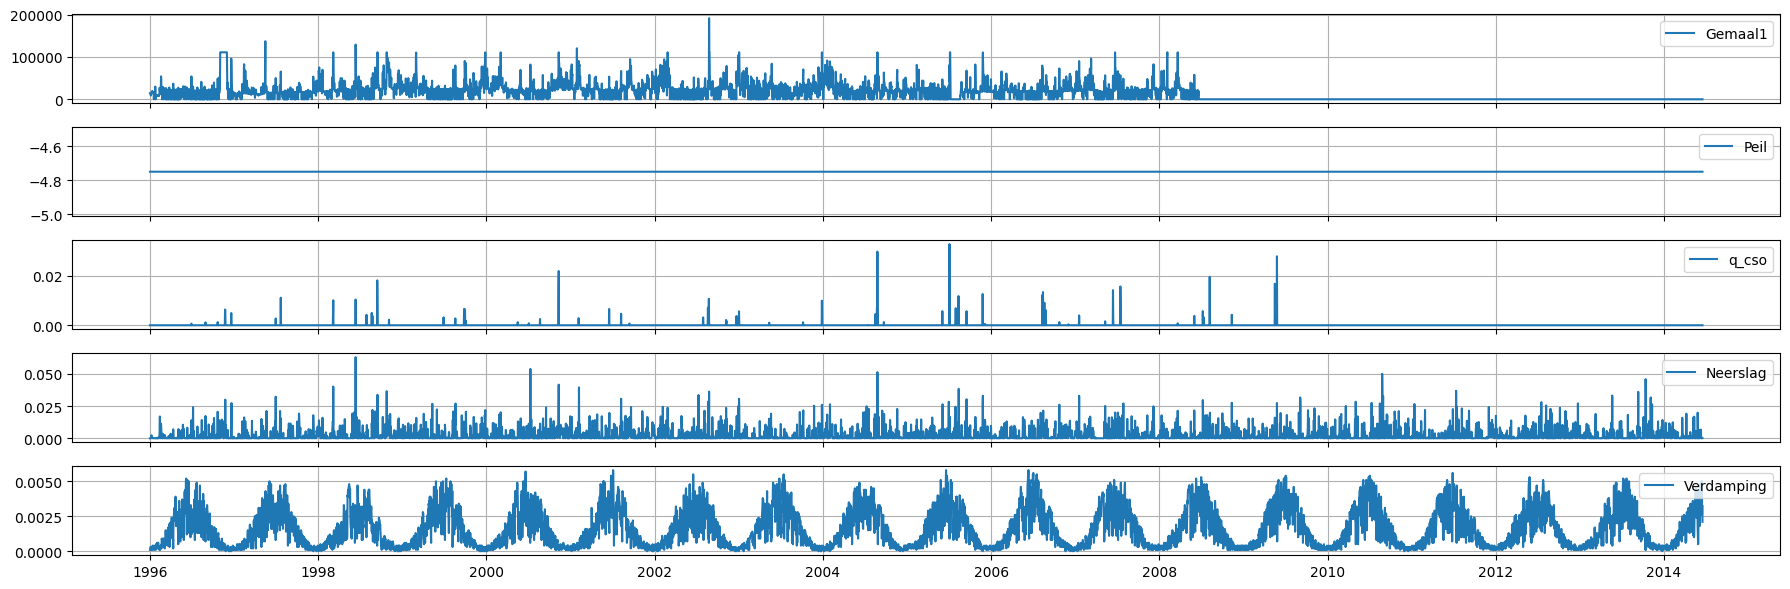

In [8]:
ax = e.plot.series()

#### [bucket](#top)<a id="2.2"></a>

Plot the fluxes for a bucket

In [9]:
buckets = e.get_buckets()
buckets

[<85000282: Verhard bucket with area 2915860.0>,
 <85000283: Onverhard bucket with area 1964984.0>,
 <85000284: Drain bucket with area 1964984.0>,
 <85000288: Onverhard bucket with area 570826.0>,
 <85000289: Drain bucket with area 570826.0>]

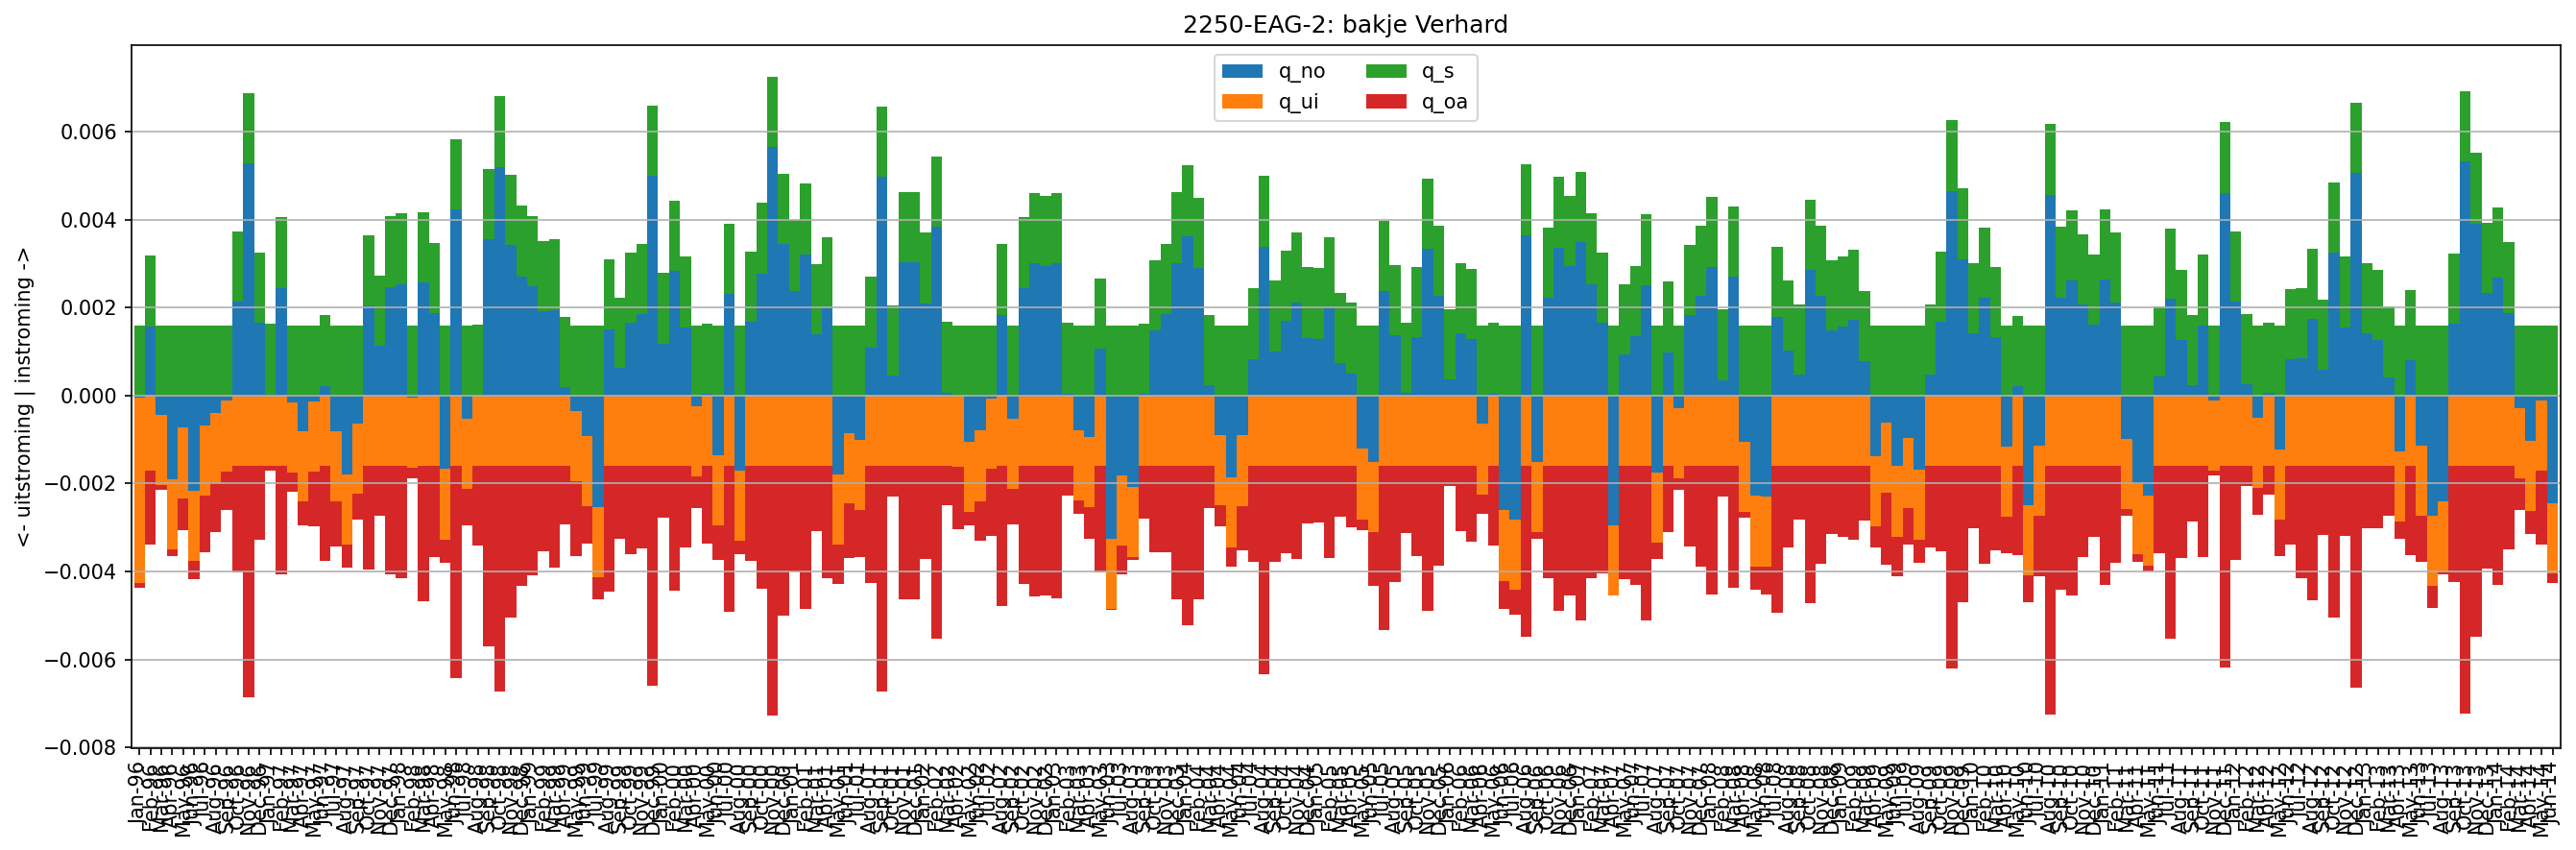

In [10]:
ax = e.plot.bucket(85000282)

#### [aggregated](#top)<a id="2.3"></a>

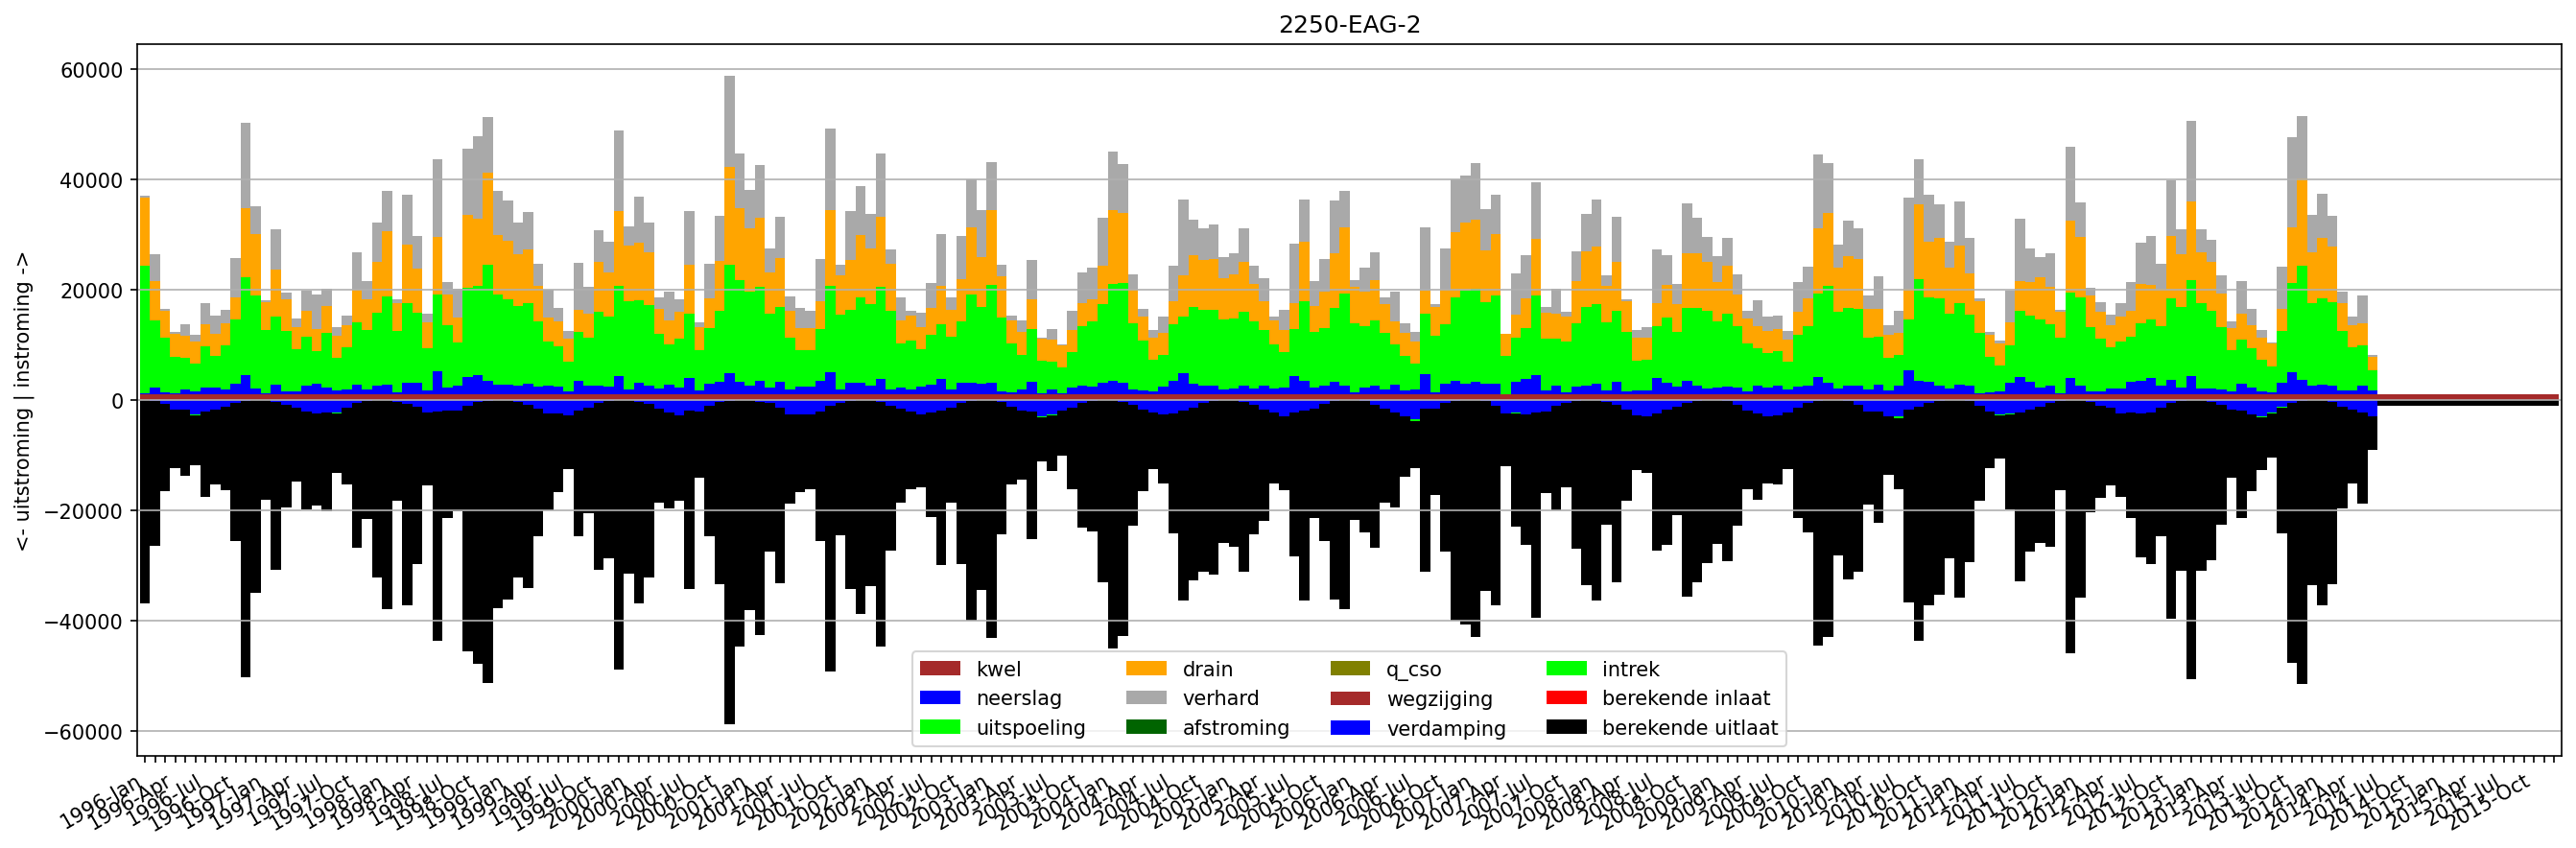

In [11]:
ax = e.plot.aggregated(tmax="2015")

#### [fractions](#top)<a id="2.4"></a>

Plot the fractions (i.e. the amount of water coming from a particular source as a fraction of the total amount of water entering the system).

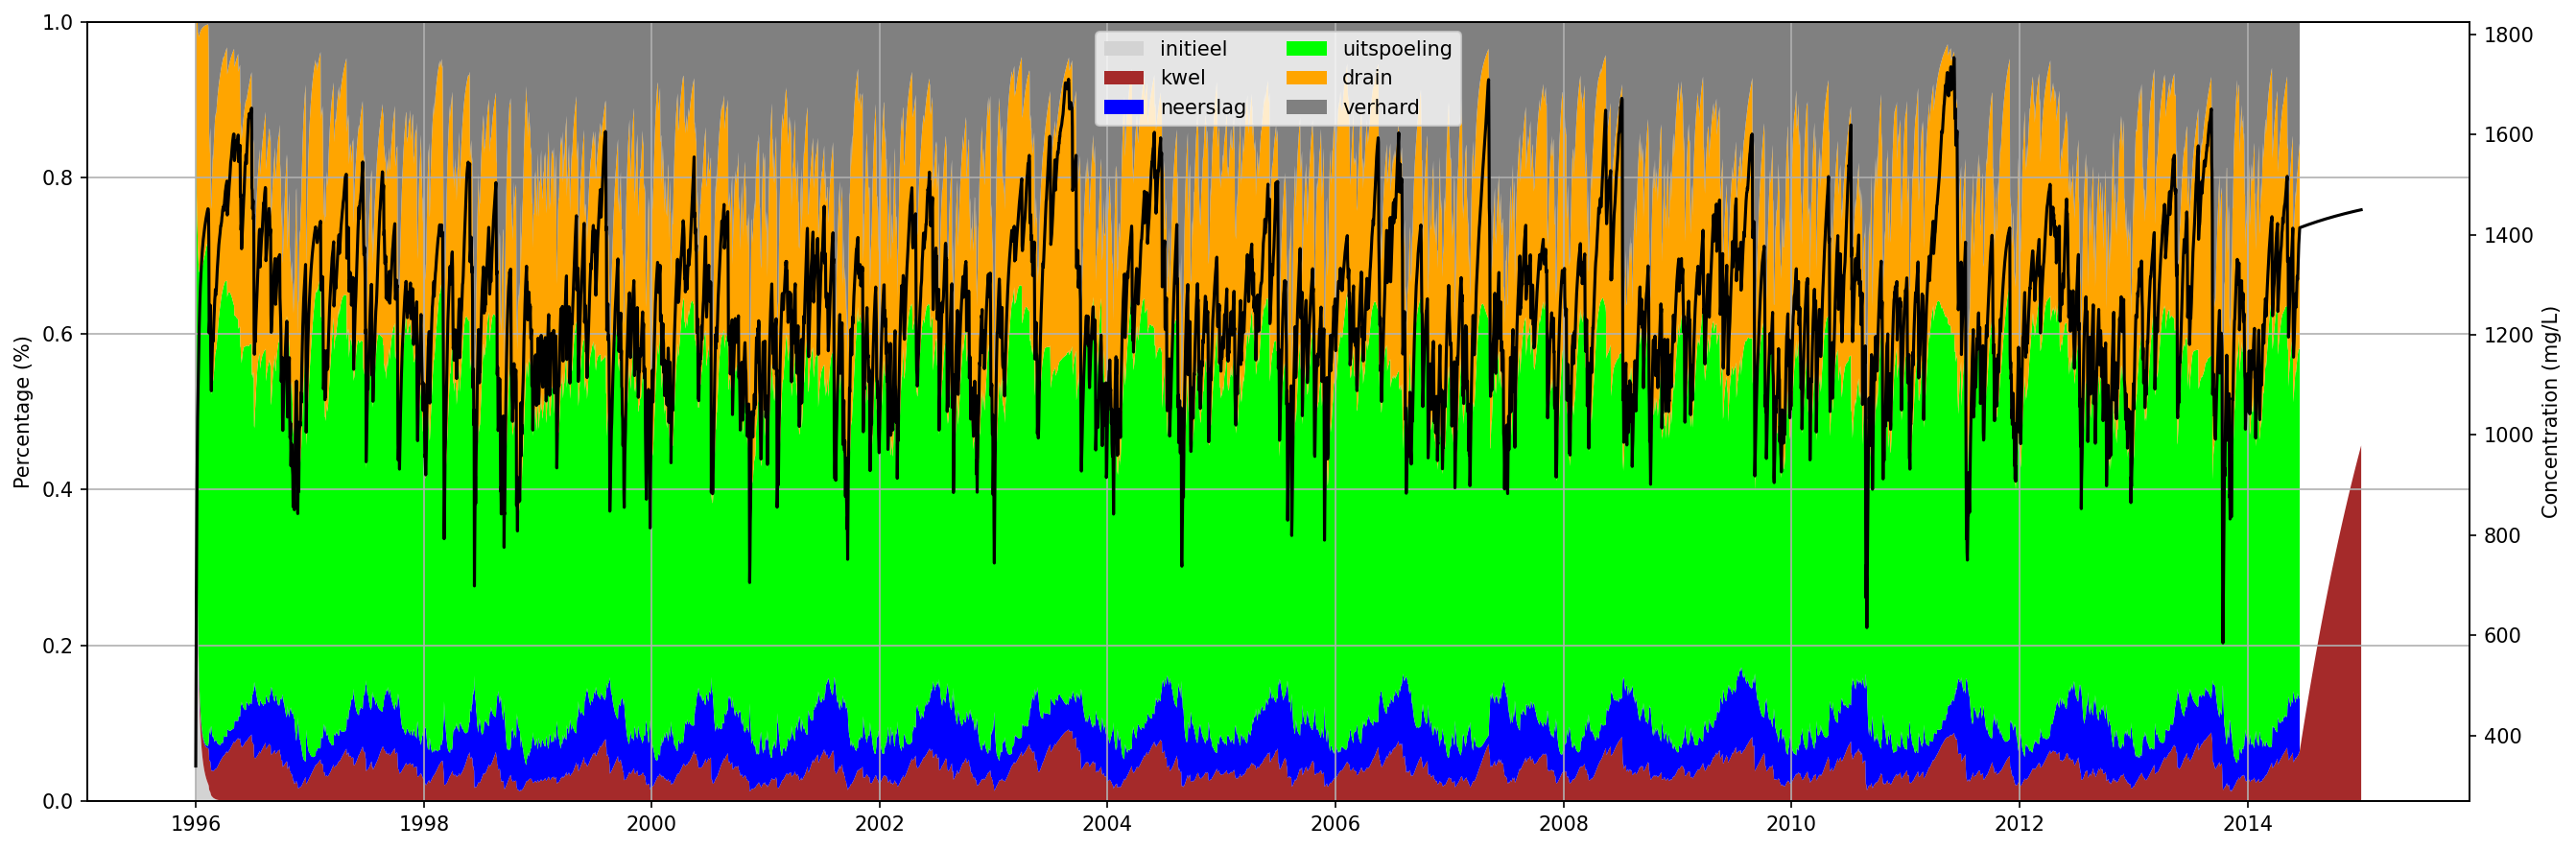

In [12]:
ax = e.plot.fractions(concentration=C_cl.loc["1996":"2014"], tmin="1996", tmax="2014")

#### [gemaal](#top)<a id="2.5"></a>

Plot the pumping station timeseries if available

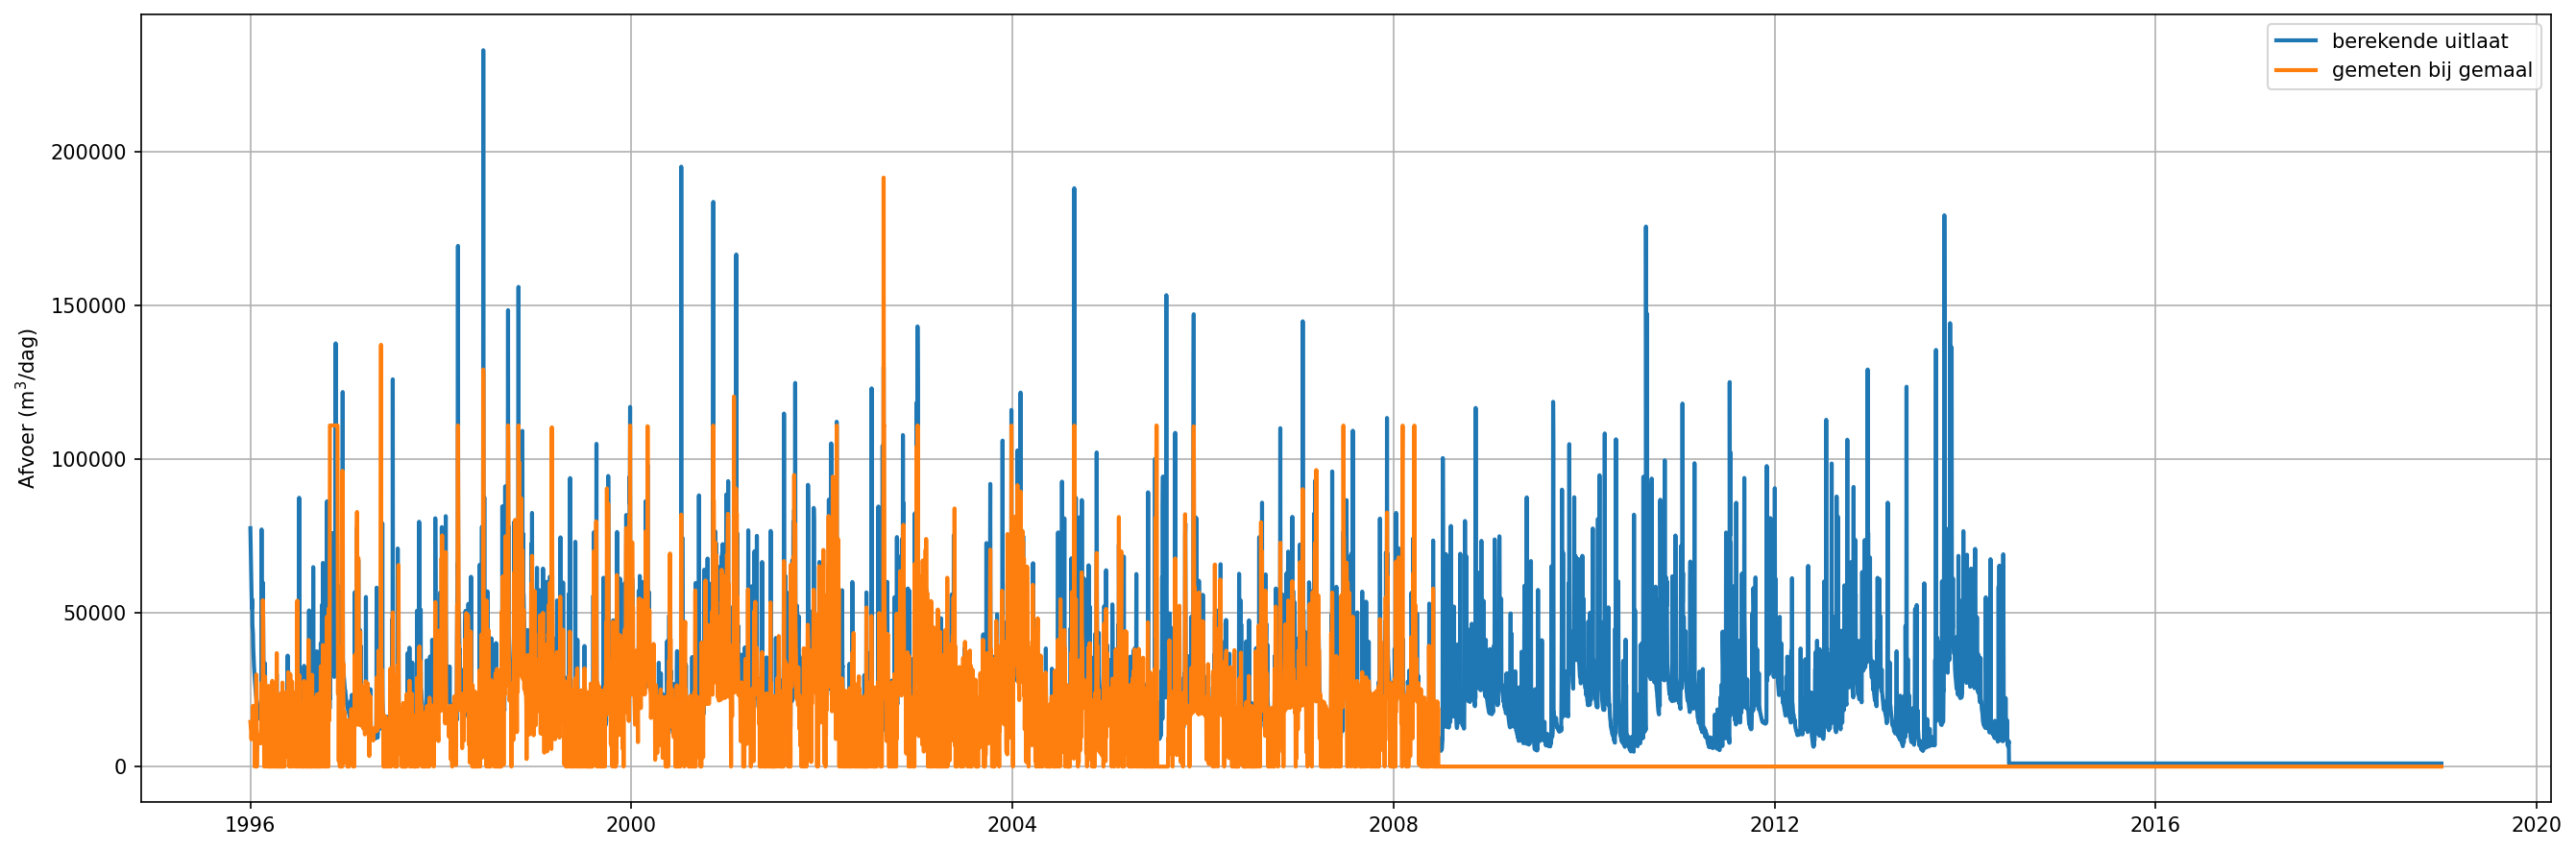

In [13]:
ax = e.plot.gemaal()

#### [cumsum_series](#top)<a id="2.6"></a>

Plot the cumulative sum of the in and outgoing fluxes and compare to the measured outgoing volume of the pumping station and/or measured inlet.

Pass the flux names from the waterbalance simulation in `fluxes_names` and the names of the observation series in `eagseries_names`. The observation series _must_ be present in the `e.series` DataFrame.

/home/david/anaconda3/envs/waterbalans/lib/python3.7/site-packages/pandas/core/indexing.py:791: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_lowerdim(tup)


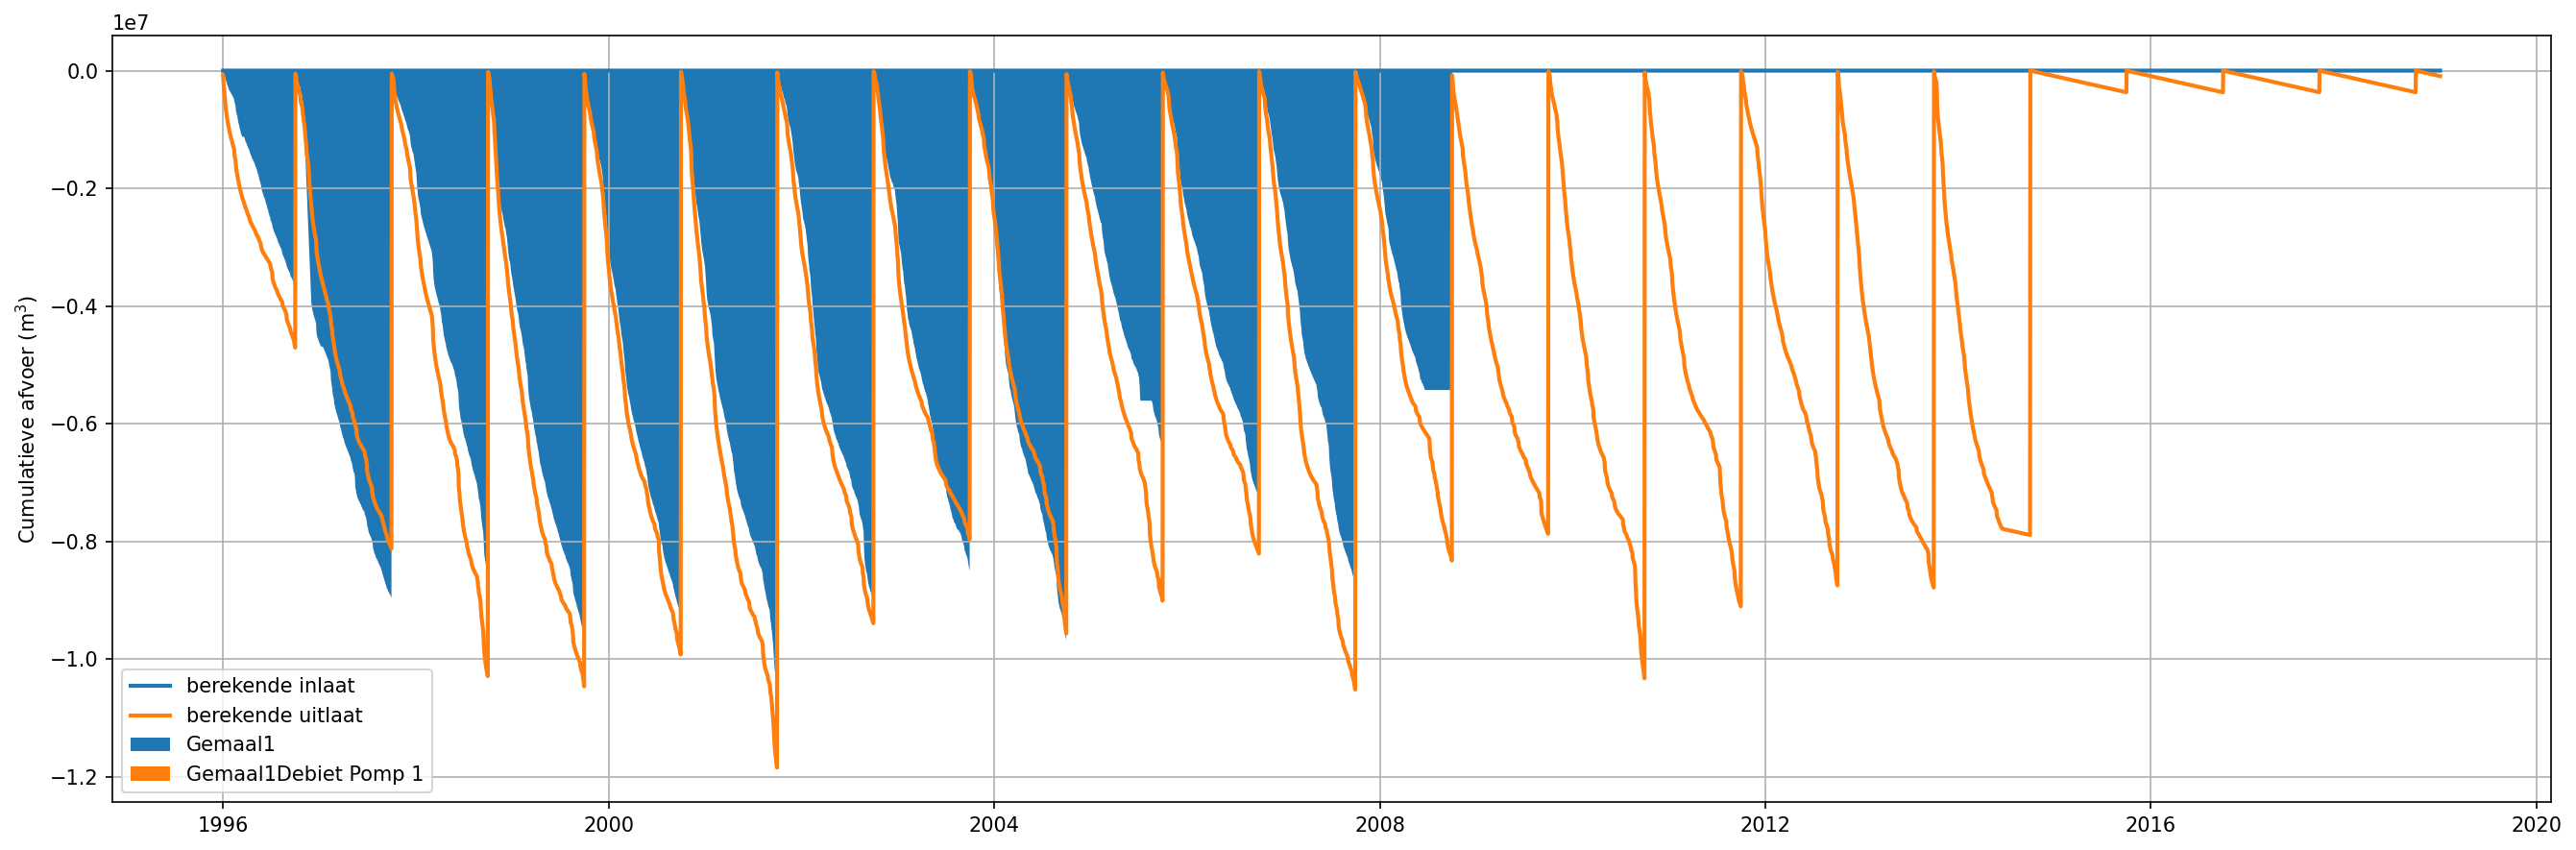

In [14]:
ax = e.plot.cumsum_series(fluxes_names=('berekende inlaat', 'berekende uitlaat'), 
                          eagseries_names=("Gemaal1", 'Gemaal1Debiet Pomp 1'))

#### [water_level](#top)<a id="2.7"></a>

Plot the calculated water level, the target levels and the bottom level.

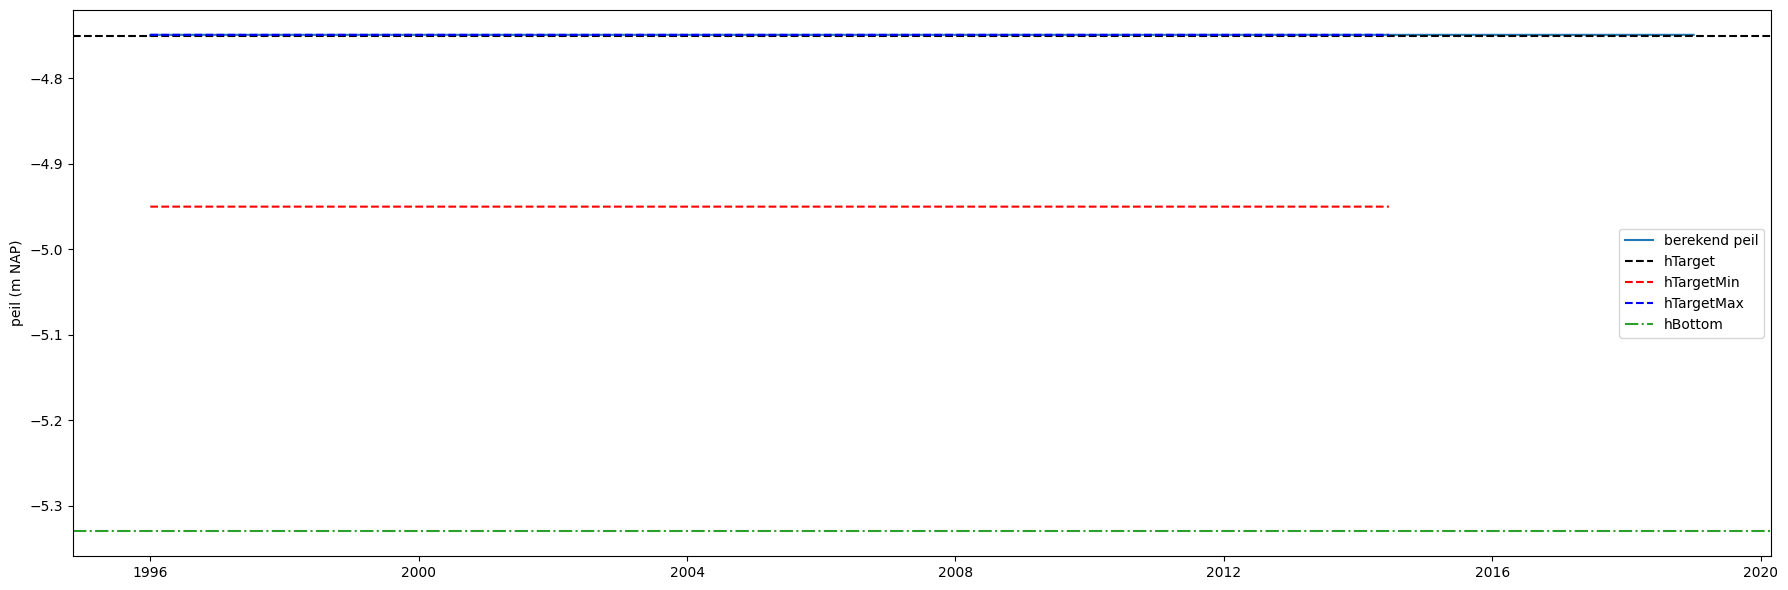

In [15]:
ax = e.plot.water_level(plot_obs=False)

In [16]:
ax = e.plot.water_level

#### [wq_concentration](#top)<a id="2.8"></a>

Plot the concentration of a water quality parameter by passing a timeseries with the calculated concentration.

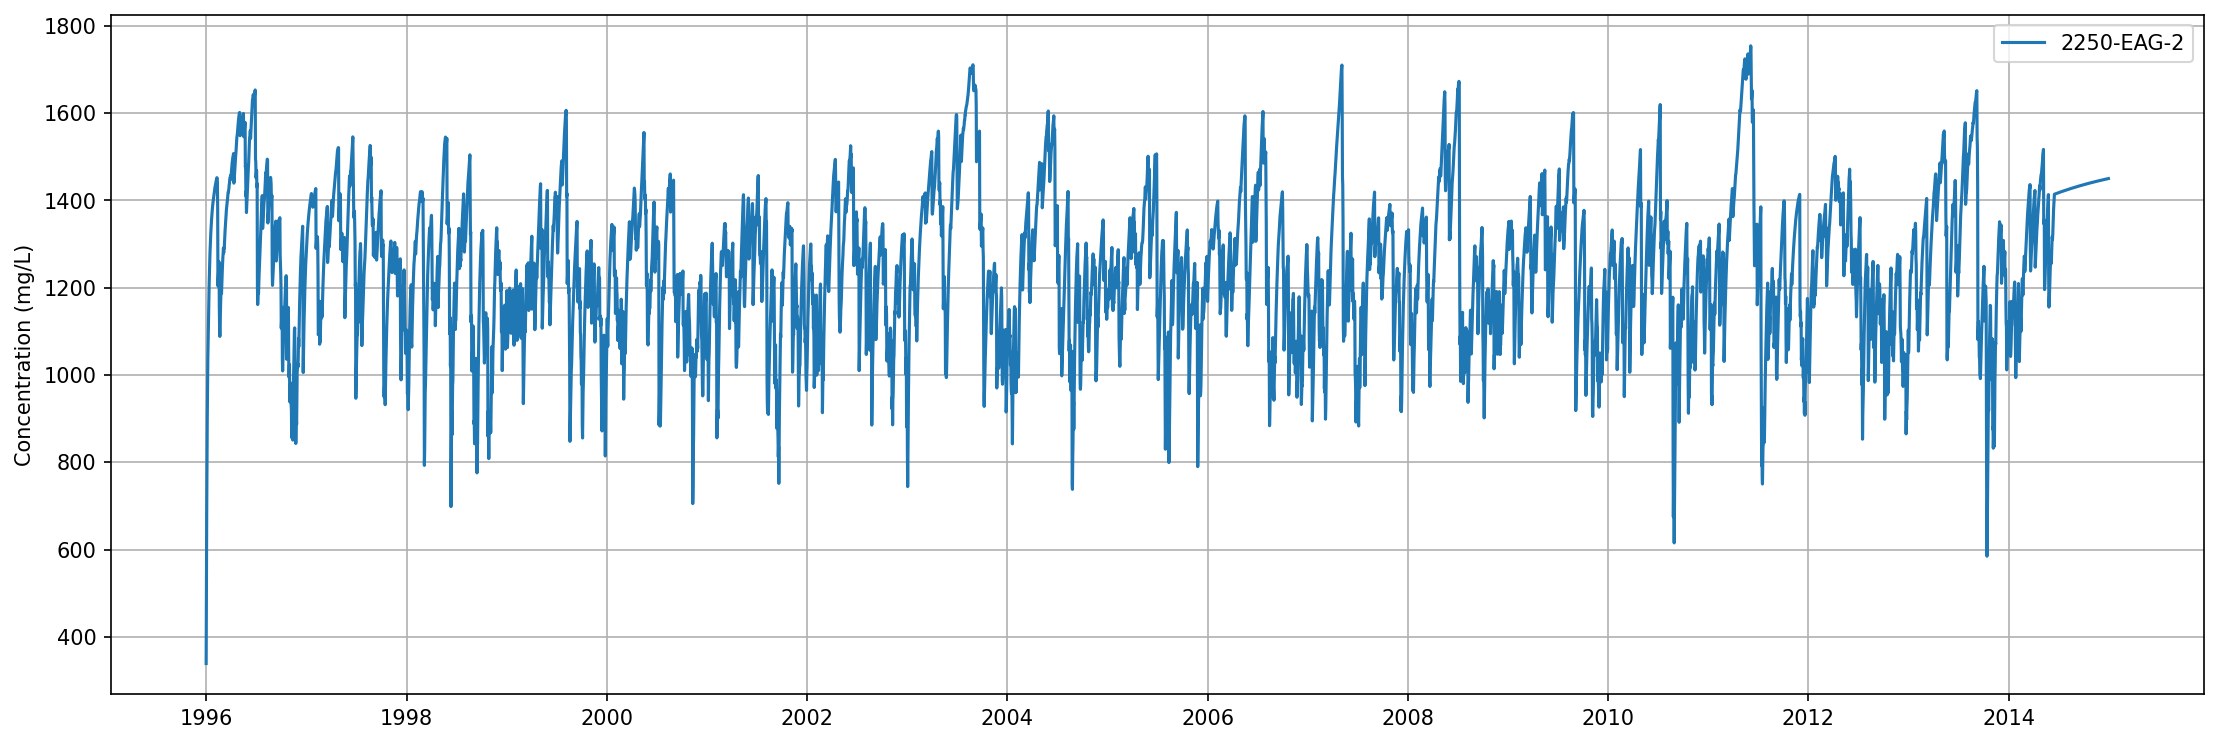

In [17]:
ax = e.plot.wq_concentration(C_cl, tmin="1996", tmax="2014")

#### [wq_loading](#top)<a id="2.9"></a>

Visualize the loading on the system over a certain period with `e.plot.wq_loading`:

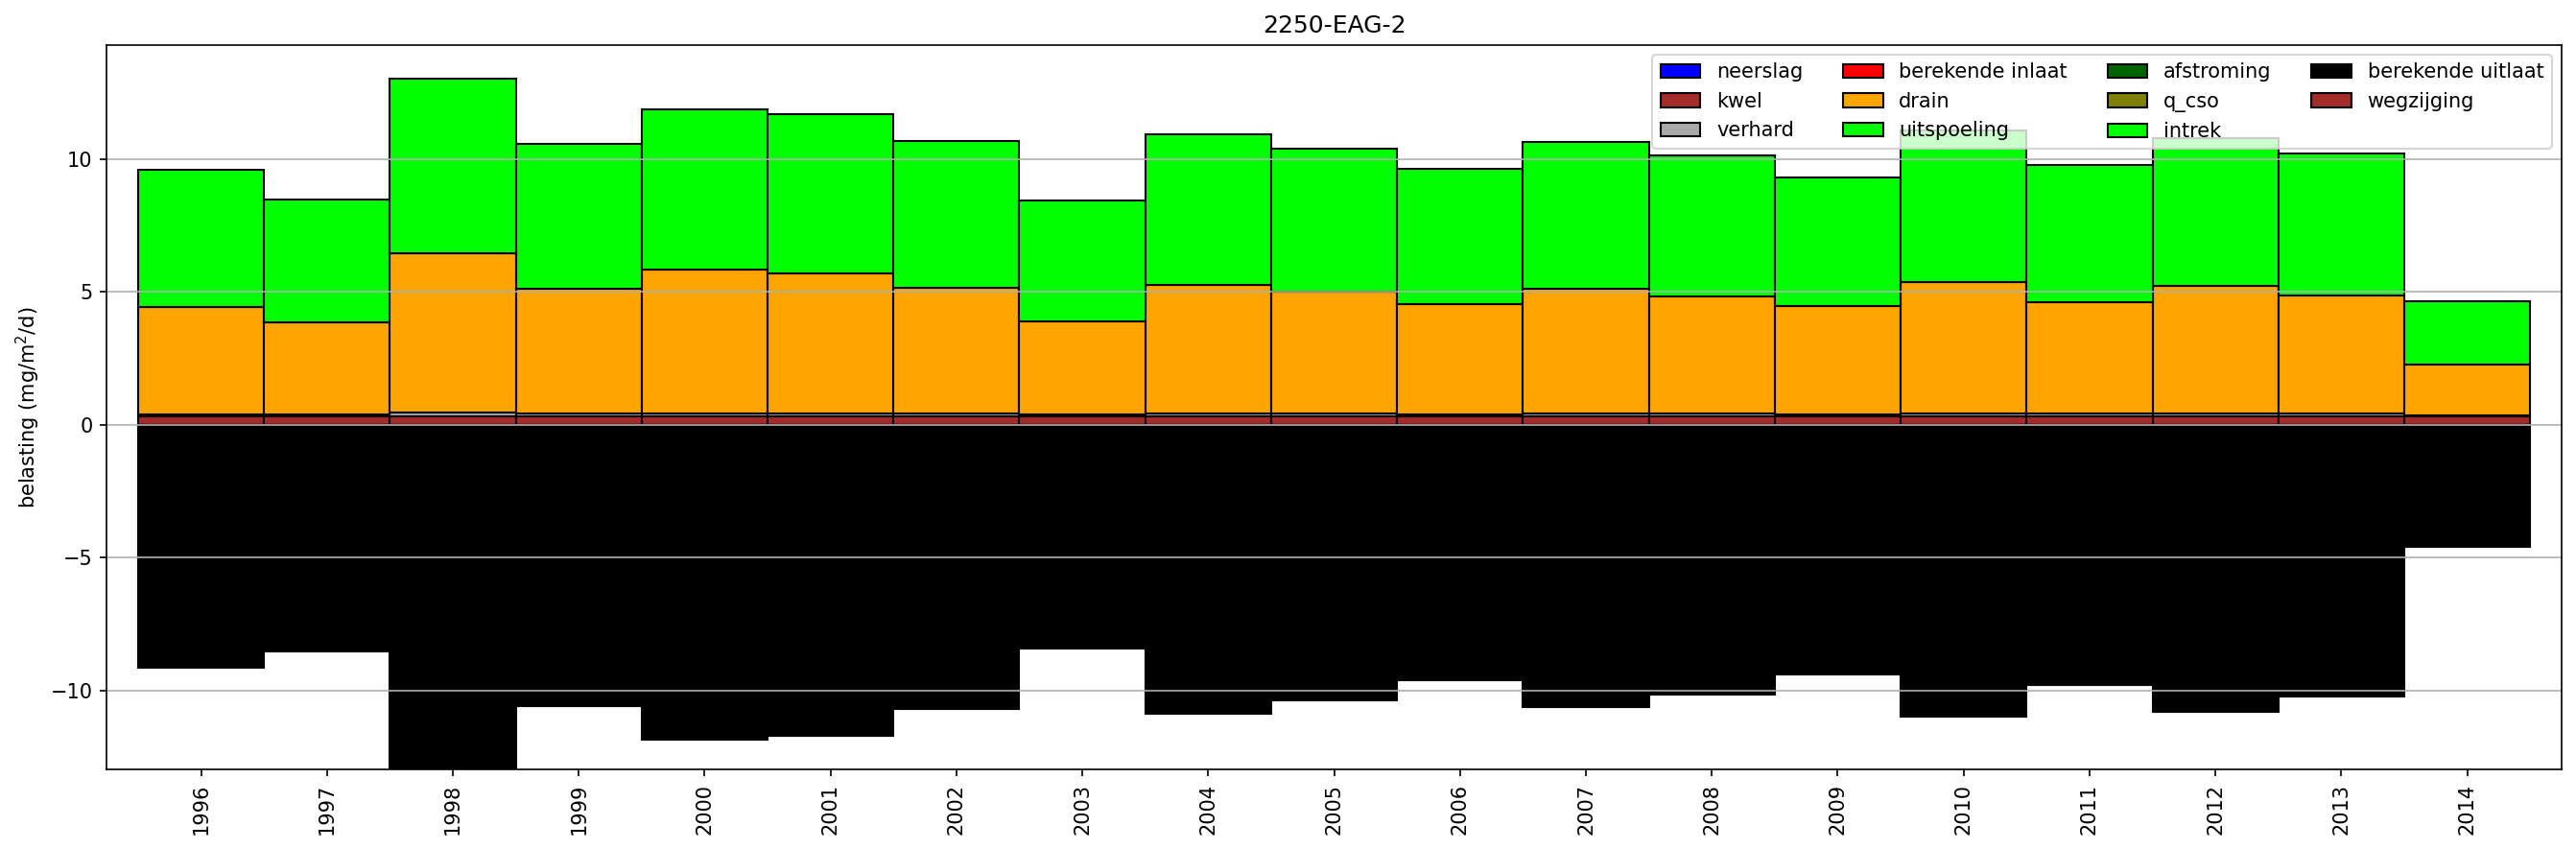

In [18]:
ax = e.plot.wq_loading(P_mass_in, P_mass_out, tmax="2014", freq="Y")

#### [compare_fluxes_to_excel_balance](#top)<a id="2.10"></a>

Load the fluxes calculated by excel and compare to results calculated by the waterbalans Python module

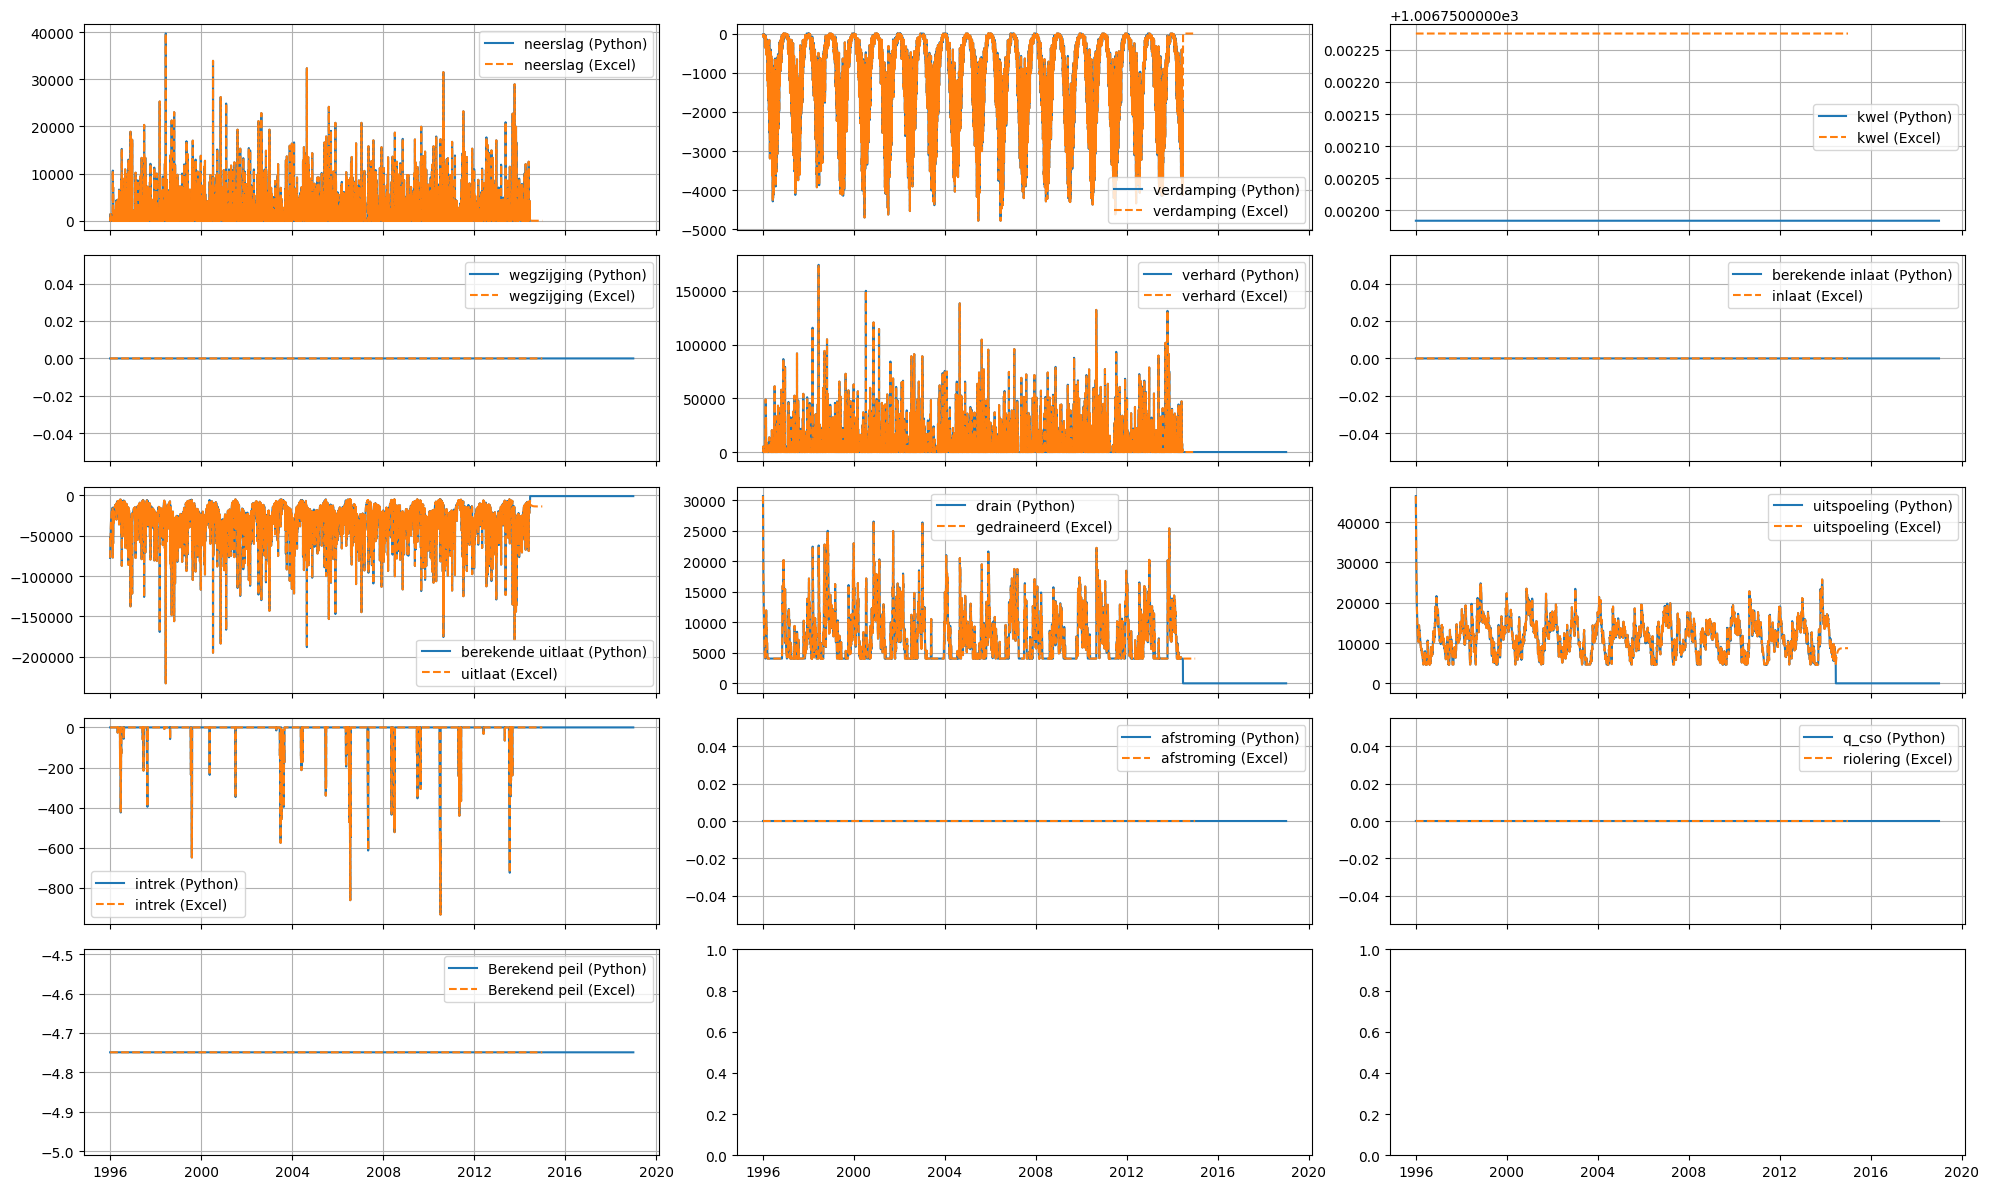

In [19]:
exceldf = pd.read_pickle("../../data/excel_pklz/2250-EAG-2_wbalance.pklz", compression="zip")
fig = e.plot.compare_fluxes_to_excel_balance(exceldf, showdiff=False)

#### [compare_waterlevel_to_excel](#top)<a id="2.11"></a>

Compare the water level calculated in Excel with the water level calculated by Python.

<AxesSubplot:>

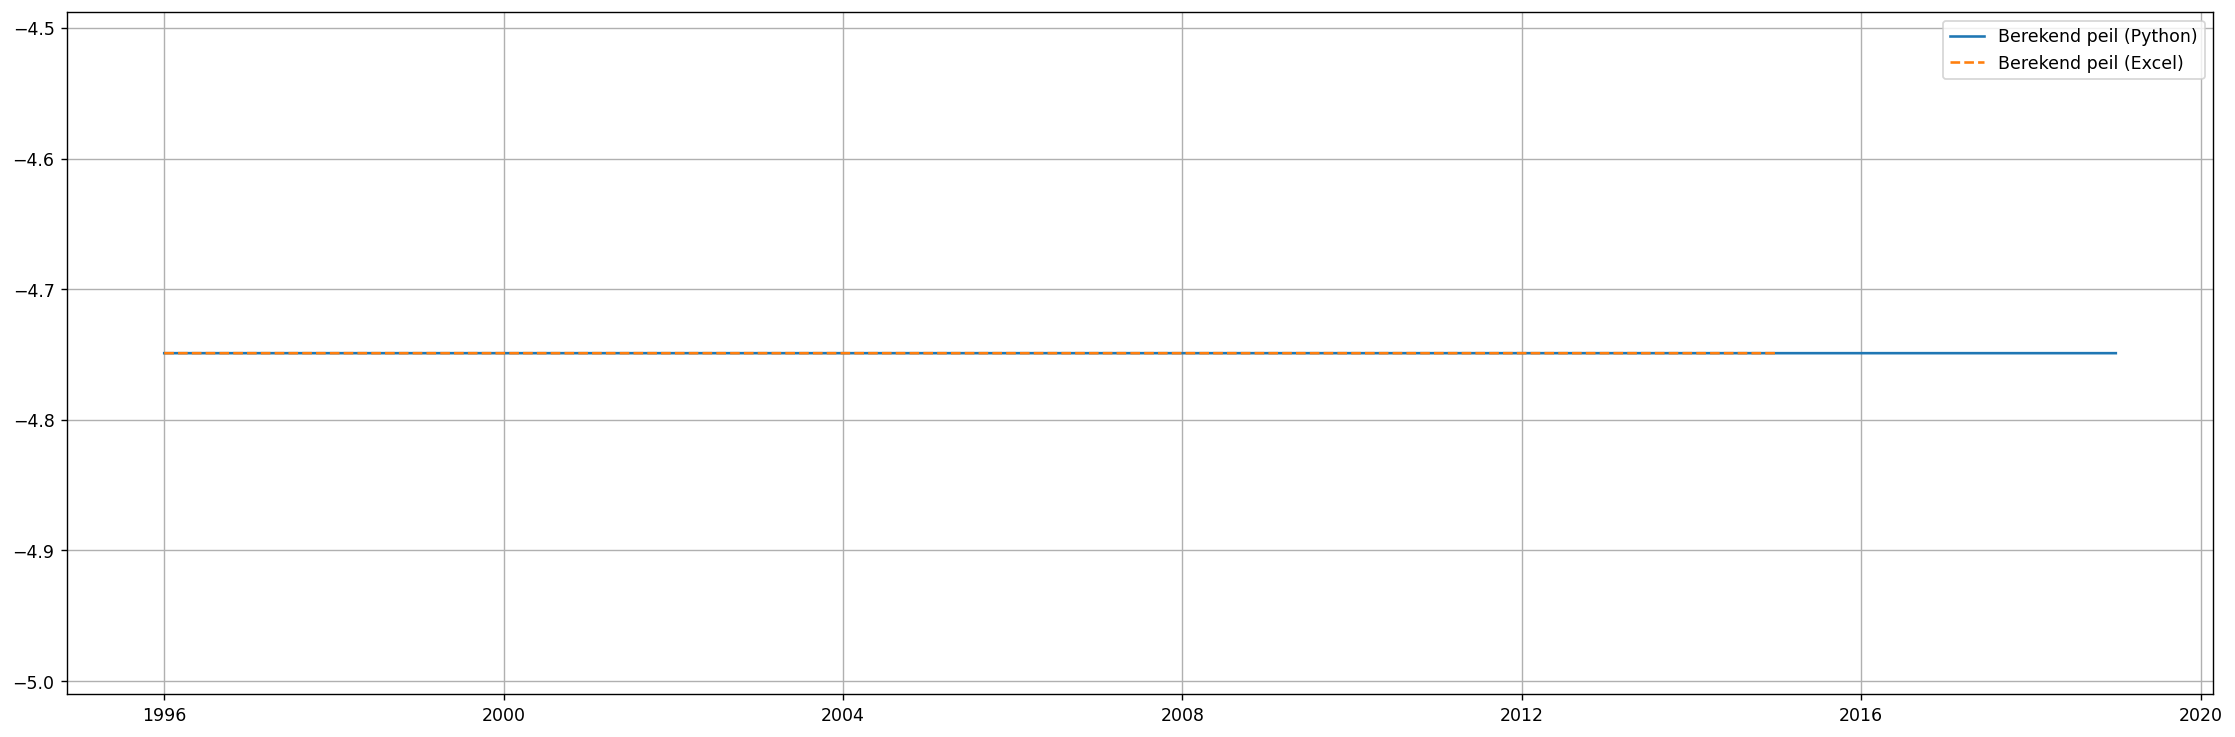

In [20]:
e.plot.compare_waterlevel_to_excel(exceldf)